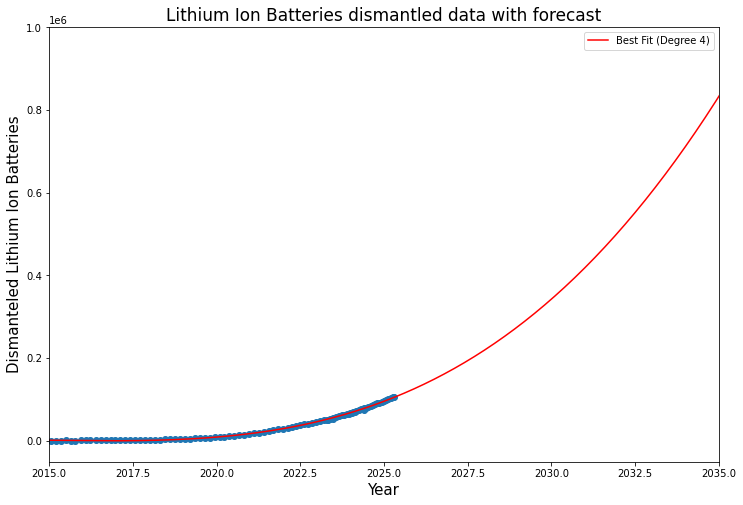

In [1]:
######## 4_1 Predicted Number of EV Lithium Ion Batteries Dismantled per year up to 2035 ############

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Replace 'url_to_your_csv_file' with the raw GitHub URL of your CSV file
csv_url = r'https://raw.githubusercontent.com/varunraaju/Battery_Cycle_Plots/main/4_1/DISMANTELED_DATA.csv'
df = pd.read_csv(csv_url)

# Visualize the data
# plt.figure(figsize=(10, 6))
# plt.scatter(df['YEAR'], df['DISMANTELED'])
# plt.xlabel('Year')
# plt.ylabel('Dismantled')
# plt.title('Dismantled Data')
# plt.show()

# Fit different polynomial models and choose the best fit
best_fit_model = None
best_fit_degree = 1
best_fit_rmse = float('inf')

for degree in range(1, 5):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(df[['YEAR']])
    model = LinearRegression()
    model.fit(X_poly, df['DISMANTELED'])
    y_pred = model.predict(X_poly)
    rmse = np.sqrt(mean_squared_error(df['DISMANTELED'], y_pred))
    
    if rmse < best_fit_rmse:
        best_fit_model = model
        best_fit_degree = degree
        best_fit_rmse = rmse

# Forecast values for the years till 2035
future_years = np.arange(2011, 2036, 0.1)
X_future = poly_features.transform(future_years.reshape(-1, 1))
y_future = best_fit_model.predict(X_future)

# Plot the forecasted values
plt.figure(figsize=(12, 8))
plt.scatter(df['YEAR'], df['DISMANTELED'])
plt.plot(future_years, y_future, color='red', label=f'Best Fit (Degree {best_fit_degree})')
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Dismanteled Lithium Ion Batteries',fontsize = 15)
plt.title('Lithium Ion Batteries dismantled data with forecast',fontsize = 17)
plt.xlim(2015, 2035)  # Adjust the x-axis limits to show data from 2015 to 2035
plt.legend()
plt.show()
